<a href="https://colab.research.google.com/github/zpetey28/IS4487_ZackPeterson/blob/main/Copy_of_lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 10

## Outline

Repeat exercises from Lab 9, but with the *Air Quality Daily AQI* dataset.

Pull the latest "Daily AQI by County" file from this link: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

Your target variable is *CATEGORY*, indicating if the air is healthy.  You can focus on either the entire country, split the country in regions, or focus on just one area (ex. Utah).   You can reduce noise by aggregating the data to the month of season level.   

Can you predict the category based on the location and time of year?  

The AQI is divided into six categories:

*Air Quality Index*

|(AQI) Values	|Levels of Health Concern	        |
|---------------|--------|
|0-50	        |Good	 |
|51-100	        |Moderate	 |
|101-150	    |Unhealthy for Sensitive Groups	|
|151 to 200	    |Unhealthy	 |
|201 to 300	    |Very Unhealthy	 |
|301 to 500	    |Hazardous	 |

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the air quality dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [6]:

utah_data_file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Analytics/Lab 10/daily_aqi_by_county_2023.csv'
utah_data = pd.read_csv(utah_data_file_path)

## Prepare Data

➡️ Assignment Tasks
- Create one dummy variable (true/false) for each of the Defining Parameter values    
- Create variables for month and season
- Perform any other data cleanup needed (remove outliers, nulls, etc.)
- Select the data you would like to use in the model.  If you aggregate data, you will have to decide whether to use the min, max or mean value for AQI

In [11]:
utah_data['Month'] = pd.to_datetime(utah_data['Date']).dt.month

# Creating dummy variables for 'Defining Parameter'
parameter_dummies = pd.get_dummies(utah_data['Defining Parameter'], prefix='Parameter')

# Joining the dummy variables with the cleaned data
utah_data_with_parameters = utah_data.join(parameter_dummies)

## Create Regression

➡️ Assignment Tasks
- Create a simple linear regression to predict AQI based on as many variables as you can use or derive.
- Visualize the regression

In [12]:


# Preparing data for linear regression
X = utah_data_with_parameters[['Month'] + [col for col in utah_data_with_parameters.columns if col.startswith('Parameter_')]]
y = utah_data_with_parameters['AQI']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)

(519.4262399639235, 0.082756167032627)

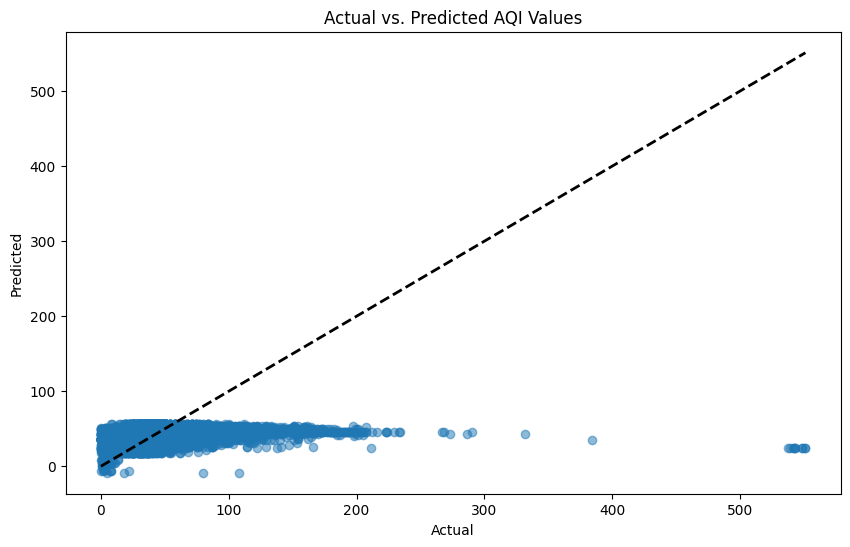

In [13]:
#visual

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted AQI Values')
plt.show()

## Make a prediction

➡️ Assignment Tasks
- What would you predict the average AQI to be in the month of January?  

In [17]:
# Creating inputs for January with each possible 'Defining Parameter'
unique_defining_parameters = [col for col in X.columns if col.startswith('Parameter_')]
january_inputs = pd.DataFrame({
    'Month': 1,
    # Set each defining parameter dummy variable to 0 initially
    **{param: 0 for param in unique_defining_parameters}
}, index=[0])

# We'll create a separate input for each 'Defining Parameter', predict, and then average
predictions = []

for param in unique_defining_parameters:
    # Set the current defining parameter to 1
    temp_input = january_inputs.copy()
    temp_input[param] = 1

    # Predict the AQI for this setup
    prediction = model.predict(temp_input)
    predictions.append(prediction[0])

# Calculating the average prediction
average_prediction = np.mean(predictions)
print(f"The prediction for January is {average_prediction}")

The prediction for January is 21.457298730396637


## OPTIONAL: Compare Air Quality

➡️ Assignment Tasks
- Download the data from a year 20 years prior, using this website: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
- Append the new data to the previous dataframe
- Use the year as a variable in your regression.  Is year a significant factor in predicting AQI?

In [ ]:
#import, append and create new model